# Toxic Comment Classification Challenge




## Section 1 - Data overview and analysis on train.csv

In [1]:
import os
import pandas as pd

In [2]:
file_path = "dataset"
files = os.listdir(file_path)

In [3]:
file_train = 'train.csv'

In [4]:
df_train = pd.read_csv(os.path.join(file_path,file_train))

In [5]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
#Check the shape of training dataset

df_train.shape

(159571, 8)

In [7]:
#Check numbers of null values in each column

df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
#Count the number of comments of each class

df_cat = df_train.drop(['id','comment_text'],axis = 1)
counts = []
categories = list(df_cat.columns.values)
for i in categories:
    counts.append((i, df_cat[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


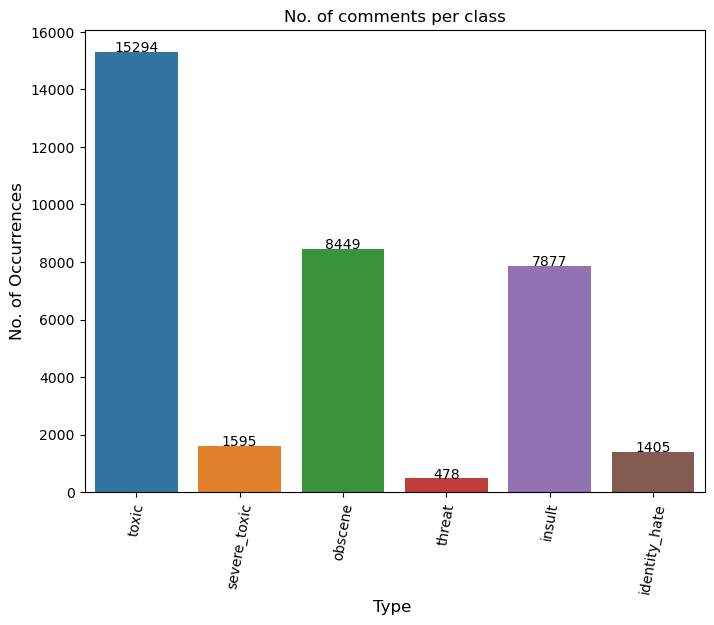

In [10]:
#Vistuallize the numbers of toxic comments by category

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
ax = sns.barplot(x=df_stats.category.values, y=df_stats.number_of_comments.values)
plt.xticks(rotation=80)
plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

# Add values on each bar
for i, v in enumerate(df_stats.number_of_comments.values):
    ax.text(i, v+0.5, str(v), ha='center')

plt.show()

In [11]:
#Percentage of each category of toxic comment to total comment

for i in list(df_cat.columns):
    print("Percentage of {0} comments: ".format(i), round(100*df_cat[i].mean(),2), "%")

Percentage of toxic comments:  9.58 %
Percentage of severe_toxic comments:  1.0 %
Percentage of obscene comments:  5.29 %
Percentage of threat comments:  0.3 %
Percentage of insult comments:  4.94 %
Percentage of identity_hate comments:  0.88 %


In [12]:
#Count the toxic and clean comments as a whole

rowsums = df_train.iloc[:,2:8].sum(axis=1)
df_train['clean']=(rowsums==0)
df_train['clean'].value_counts()

True     143346
False     16225
Name: clean, dtype: int64

## Section 2 - Clean and preprocess the text data in df_train

In [13]:
# Create a function to clean the text data and remove all the unnecessary elements.

import re
import string
import spacy
nlp = spacy.load('en_core_web_sm')
def preprocessed(text):
    # Replace common short-form words to expanded forms
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\ u ", " you ", text)
    # Remove html chars
    text = re.sub('<.*?>','',text)
    # Remove text in square brackets and parenthesis
    text = re.sub('\[|\(.*\]|\)','', text)
    # Remove non-ascii chars
    text = re.sub("(\\W)"," ",text)
    # Remove words containing numbers
    text = re.sub('\S*\d\S*\s*','', text)
    # Tokenize the text
    doc = nlp(text)
    # Lemmatize each token and remove stopwords, punctuation, and whitespace
    cleaned_tokens = [token.lemma_.lower() for token in doc if not token.is_stop
                      and not token.is_punct and not token.is_space]

     # Join the tokens back into a cleaned text
    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
df_train['preprocessed_text'] = df_train.comment_text.apply(preprocessed)

In [15]:
df_train['preprocessed_text'].head()

0    explanation edit username hardcore metallica f...
1    d aww match background colour m seemingly stuc...
2    hey man m try edit war guy constantly remove r...
3    real suggestion improvement wonder section sta...
4                        sir hero chance remember page
Name: preprocessed_text, dtype: object

### Separate our dataset into 6 individual dataframes to extract the most frequent words in each category

In [16]:
data_tox = df_train.loc[:,['id','preprocessed_text','toxic']]
data_tox

,id,preprocessed_text,toxic
0,0000997932d777bf,explanation edit username hardcore metallica f...,0
1,000103f0d9cfb60f,d aww match background colour m seemingly stuc...,0
2,000113f07ec002fd,hey man m try edit war guy constantly remove r...,0
3,0001b41b1c6bb37e,real suggestion improvement wonder section sta...,0
4,0001d958c54c6e35,sir hero chance remember page,0
...,...,...,...
159566,ffe987279560d7ff,second time ask view completely contradict cov...,0
159567,ffea4adeee384e90,ashamed horrible thing talk page,0
159568,ffee36eab5c267c9,spitzer umm s actual article prostitution ring...,0
159569,fff125370e4aaaf3,look like actually speedy version delete look,0


In [17]:
data_ser_tox = df_train.loc[:,['id','preprocessed_text','severe_toxic']]
data_ser_tox

,id,preprocessed_text,severe_toxic
0,0000997932d777bf,explanation edit username hardcore metallica f...,0
1,000103f0d9cfb60f,d aww match background colour m seemingly stuc...,0
2,000113f07ec002fd,hey man m try edit war guy constantly remove r...,0
3,0001b41b1c6bb37e,real suggestion improvement wonder section sta...,0
4,0001d958c54c6e35,sir hero chance remember page,0
...,...,...,...
159566,ffe987279560d7ff,second time ask view completely contradict cov...,0
159567,ffea4adeee384e90,ashamed horrible thing talk page,0
159568,ffee36eab5c267c9,spitzer umm s actual article prostitution ring...,0
159569,fff125370e4aaaf3,look like actually speedy version delete look,0


In [18]:
data_obs = df_train.loc[:,['id','preprocessed_text','obscene']]
data_obs

,id,preprocessed_text,obscene
0,0000997932d777bf,explanation edit username hardcore metallica f...,0
1,000103f0d9cfb60f,d aww match background colour m seemingly stuc...,0
2,000113f07ec002fd,hey man m try edit war guy constantly remove r...,0
3,0001b41b1c6bb37e,real suggestion improvement wonder section sta...,0
4,0001d958c54c6e35,sir hero chance remember page,0
...,...,...,...
159566,ffe987279560d7ff,second time ask view completely contradict cov...,0
159567,ffea4adeee384e90,ashamed horrible thing talk page,0
159568,ffee36eab5c267c9,spitzer umm s actual article prostitution ring...,0
159569,fff125370e4aaaf3,look like actually speedy version delete look,0


In [19]:
data_threat = df_train.loc[:,['id','preprocessed_text','threat']]
data_threat

,id,preprocessed_text,threat
0,0000997932d777bf,explanation edit username hardcore metallica f...,0
1,000103f0d9cfb60f,d aww match background colour m seemingly stuc...,0
2,000113f07ec002fd,hey man m try edit war guy constantly remove r...,0
3,0001b41b1c6bb37e,real suggestion improvement wonder section sta...,0
4,0001d958c54c6e35,sir hero chance remember page,0
...,...,...,...
159566,ffe987279560d7ff,second time ask view completely contradict cov...,0
159567,ffea4adeee384e90,ashamed horrible thing talk page,0
159568,ffee36eab5c267c9,spitzer umm s actual article prostitution ring...,0
159569,fff125370e4aaaf3,look like actually speedy version delete look,0


In [20]:
data_insult = df_train.loc[:,['id','preprocessed_text','insult']]
data_insult

,id,preprocessed_text,insult
0,0000997932d777bf,explanation edit username hardcore metallica f...,0
1,000103f0d9cfb60f,d aww match background colour m seemingly stuc...,0
2,000113f07ec002fd,hey man m try edit war guy constantly remove r...,0
3,0001b41b1c6bb37e,real suggestion improvement wonder section sta...,0
4,0001d958c54c6e35,sir hero chance remember page,0
...,...,...,...
159566,ffe987279560d7ff,second time ask view completely contradict cov...,0
159567,ffea4adeee384e90,ashamed horrible thing talk page,0
159568,ffee36eab5c267c9,spitzer umm s actual article prostitution ring...,0
159569,fff125370e4aaaf3,look like actually speedy version delete look,0


In [21]:
data_id_hate = df_train.loc[:,['id','preprocessed_text','identity_hate']]
data_id_hate

,id,preprocessed_text,identity_hate
0,0000997932d777bf,explanation edit username hardcore metallica f...,0
1,000103f0d9cfb60f,d aww match background colour m seemingly stuc...,0
2,000113f07ec002fd,hey man m try edit war guy constantly remove r...,0
3,0001b41b1c6bb37e,real suggestion improvement wonder section sta...,0
4,0001d958c54c6e35,sir hero chance remember page,0
...,...,...,...
159566,ffe987279560d7ff,second time ask view completely contradict cov...,0
159567,ffea4adeee384e90,ashamed horrible thing talk page,0
159568,ffee36eab5c267c9,spitzer umm s actual article prostitution ring...,0
159569,fff125370e4aaaf3,look like actually speedy version delete look,0


In [22]:
from collections import Counter
def select_top_words(df, label):
    # Concatenate text columns into a single column, if needed
    # dataframe['concatenated'] = dataframe['Text1'] + ' ' + dataframe['Text2'] + ...

    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.preprocessed_text

    # Tokenize the text into words
    tokens = ' '.join(text).split()

    # Count word frequency
    word_counts = Counter(tokens)

    # Select the top N most frequent words
    top_words = word_counts.most_common(10)

    return top_words

In [23]:
print("Most frequent words in toxic:", select_top_words(data_tox, 'toxic'))

Most frequent words in toxic: [('fuck', 10292), ('suck', 4346), ('wikipedia', 3676), ('shit', 3655), ('like', 3637), ('nigger', 3129), ('fucking', 3128), ('ass', 2965), ('hate', 2741), ('faggot', 2683)]


In [24]:
print("Most frequent words in severe_toxic:", select_top_words(data_ser_tox,'severe_toxic'))

Most frequent words in severe_toxic: [('fuck', 7413), ('suck', 3275), ('ass', 2119), ('shit', 1889), ('faggot', 1574), ('bitch', 1459), ('fucking', 1383), ('die', 1165), ('cunt', 1038), ('u', 1017)]


In [25]:
print("Most frequent words in obscene:", select_top_words(data_obs,'obscene'))

Most frequent words in obscene: [('fuck', 10191), ('suck', 3833), ('shit', 3234), ('fucking', 3038), ('ass', 2867), ('nigger', 2544), ('bitch', 2185), ('wikipedia', 1906), ('faggot', 1883), ('cunt', 1781)]


In [26]:
print("Most frequent words in threat:", select_top_words(data_threat,'threat'))

Most frequent words in threat: [('die', 1178), ('ass', 772), ('kill', 521), ('go', 318), ('wikipedia', 200), ('block', 187), ('fuck', 176), ('jim', 158), ('wales', 156), ('page', 136)]


In [27]:
print("Most frequent words in insult:", select_top_words(data_insult,'insult'))

Most frequent words in insult: [('fuck', 8182), ('suck', 3558), ('fucking', 2665), ('nigger', 2599), ('faggot', 2522), ('ass', 2224), ('bitch', 2114), ('fat', 1928), ('shit', 1710), ('cunt', 1687)]


In [28]:
print("Most frequent words in identity_hate:", select_top_words(data_id_hate,'identity_hate'))

Most frequent words in identity_hate: [('nigger', 2794), ('fat', 1323), ('jew', 1314), ('gay', 931), ('fuck', 930), ('die', 885), ('faggot', 755), ('suck', 522), ('fucking', 503), ('huge', 430)]


### Create WordCloud to display most frequent words in each class

In [29]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [30]:
def wordcloud(df, label):

    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.preprocessed_text.values
    wc= WordCloud(background_color="black",max_words=3000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=12)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

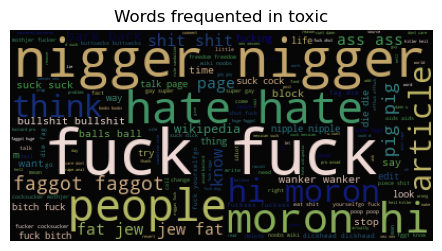

In [31]:
wordcloud(data_tox,'toxic')

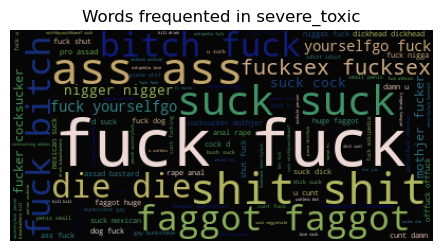

In [32]:
wordcloud(data_ser_tox,'severe_toxic')

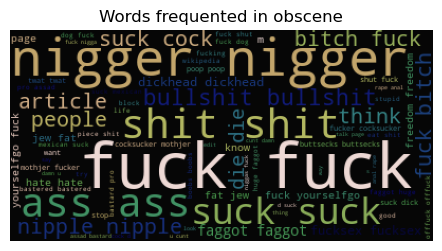

In [33]:
wordcloud(data_obs,'obscene')

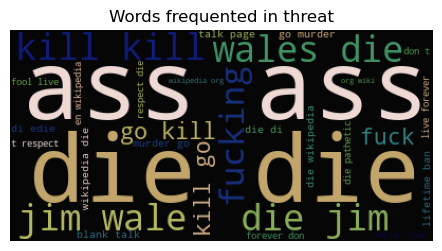

In [34]:
wordcloud(data_threat,'threat')

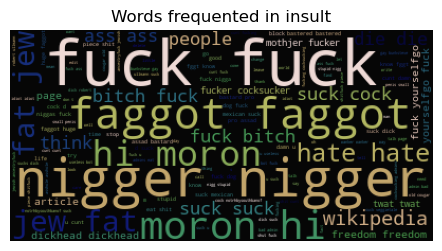

In [35]:
wordcloud(data_insult,'insult')

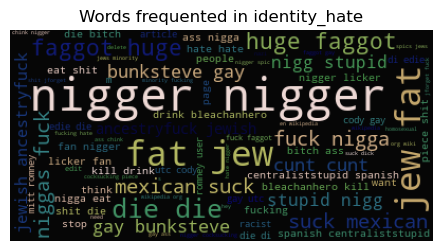

In [36]:
wordcloud(data_id_hate,'identity_hate')

## Section 3 - Machine Learning Model Training

### Train Test Split

In [37]:
# Extract X & y

X = df_train['preprocessed_text']
y = df_train.iloc[:, 2:8]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print('numbers of X_train :',len(X_train))
print('numbers of X_test :',len(X_test))
print('numbers of y_train :',len(y_train))
print('numbers of y_test :',len(y_test))

numbers of X_train : 127656
numbers of X_test : 31915
numbers of y_train : 127656
numbers of y_test : 31915


### Text vectorization (Bag of Words & TD-IDF)

Bag of Words and TF-IDF methods are used to convert text into vectors. Normalization of data is used for faster processing

In [40]:
from sklearn.feature_extraction.text import CountVectorizer # Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.preprocessing import normalize

In [41]:
# Bag of Words

cv = CountVectorizer(stop_words='english')

In [42]:
X_train_cv = cv.fit_transform(X_train.values)
X_train_cv

<127656x140187 sparse matrix of type '<class 'numpy.int64'>'
	with 2849634 stored elements in Compressed Sparse Row format>

In [43]:
X_test_cv = cv.transform(X_test.values)
X_test_cv

<31915x140187 sparse matrix of type '<class 'numpy.int64'>'
	with 683505 stored elements in Compressed Sparse Row format>

In [44]:
# TF-IDF

tfidf = TfidfVectorizer(stop_words='english')

In [45]:
X_train_tfidf = tfidf.fit_transform(X_train.values)
X_train_tfidf

<127656x140187 sparse matrix of type '<class 'numpy.float64'>'
	with 2849634 stored elements in Compressed Sparse Row format>

In [46]:
X_test_tfidf = tfidf.transform(X_test.values)
X_test_tfidf

<31915x140187 sparse matrix of type '<class 'numpy.float64'>'
	with 683505 stored elements in Compressed Sparse Row format>

In [47]:
# Normalize the data for faster processing

X_train_cv = normalize(X_train_cv)
X_train_tfidf = normalize(X_train_tfidf)
X_test_cv = normalize(X_test_cv)
X_test_tfidf = normalize(X_test_tfidf)

### Model training and evaluation

3 ML models will be deployed in this section after considering the dataset imbalanced and efficiency of running models.

ComplementNB - one of the naive bayes algorithms but it is particular used for imbalanced dataset.

RandomForestClassifier - set of decision trees, class_weight='balanced' parameter is added to assign higher weights to the minority class (less frequent class) and lower weights to the majority class (more frequent class).

SGDClassifier - it is equivalent to LogisticRegressClassifier if the parameter of loss='log_loss' is added but SGDClassifier offers higher efficiency of handling large dataset. class_weight='balanced' parameter is also added to address dataset imbalanced issue.

OneVsRestClassifier involves transforming multi-label classification problem into multiple independent binary classification problems.

In [48]:
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier # Transform a multi-label classification problem into multiple independent binary classification problems

In [49]:
# Create the models
model_1 = OneVsRestClassifier(ComplementNB())
model_2 = OneVsRestClassifier(RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'))
model_3 = OneVsRestClassifier(SGDClassifier(random_state=0, class_weight='balanced', loss='log_loss'))

In [50]:
# clf1: ComplementNB with CountVectorizer

clf1 = model_1.fit(X_train_cv, y_train)

In [51]:
# clf2: RandomForestClassifier with CountVectorizer

clf2 = model_2.fit(X_train_cv, y_train)

In [52]:
# clf3: SGDClassifier with CountVectorizer

clf3 = model_3.fit(X_train_cv, y_train)

In [53]:
# clf4: ComplementNB with TfidfVectorizer

clf4 = model_1.fit(X_train_tfidf, y_train)

In [54]:
# clf5: RandomForestClassifier with TfidfVectorizer

clf5 = model_2.fit(X_train_tfidf, y_train)

In [55]:
# clf6: SGDClassifier with TfidfVectorizer

clf6 = model_3.fit(X_train_tfidf, y_train)

In [56]:
# Import the model evaluation metrics

from sklearn.metrics import classification_report, accuracy_score, f1_score

In [57]:
# clf1

print(classification_report(y_test, clf1.predict(X_test_cv)))
print("Accruacy Score:", accuracy_score(y_test, clf1.predict(X_test_cv)))

              precision    recall  f1-score   support

           0       0.84      0.42      0.56      3056
           1       0.31      0.19      0.24       321
           2       0.78      0.43      0.55      1715
           3       0.04      0.04      0.04        74
           4       0.69      0.35      0.46      1614
           5       0.17      0.06      0.09       294

   micro avg       0.73      0.38      0.49      7074
   macro avg       0.47      0.25      0.32      7074
weighted avg       0.73      0.38      0.50      7074
 samples avg       0.04      0.03      0.03      7074

Accruacy Score: 0.9033056556478145


/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# clf2

print(classification_report(y_test, clf2.predict(X_test_cv)))
print("Accruacy Score:", accuracy_score(y_test, clf2.predict(X_test_cv)))

/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.48      0.64      3056
           1       0.47      0.15      0.23       321
           2       0.93      0.51      0.66      1715
           3       0.67      0.05      0.10        74
           4       0.82      0.37      0.51      1614
           5       0.72      0.07      0.13       294

   micro avg       0.90      0.43      0.58      7074
   macro avg       0.76      0.27      0.38      7074
weighted avg       0.88      0.43      0.57      7074
 samples avg       0.04      0.03      0.04      7074

Accruacy Score: 0.9117656274479085


In [59]:
# clf3

print(classification_report(y_test, clf3.predict(X_test_cv)))
print("Accruacy Score:", accuracy_score(y_test, clf3.predict(X_test_cv)))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68      3056
           1       0.23      0.85      0.37       321
           2       0.67      0.84      0.75      1715
           3       0.08      0.88      0.15        74
           4       0.52      0.83      0.64      1614
           5       0.17      0.80      0.28       294

   micro avg       0.48      0.81      0.60      7074
   macro avg       0.38      0.83      0.48      7074
weighted avg       0.56      0.81      0.65      7074
 samples avg       0.05      0.08      0.06      7074

Accruacy Score: 0.8605044649851167


/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# clf4

print(classification_report(y_test, clf4.predict(X_test_tfidf)))
print("Accruacy Score:", accuracy_score(y_test, clf4.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.77      0.50      0.61      3056
           1       0.29      0.24      0.26       321
           2       0.71      0.50      0.58      1715
           3       0.03      0.05      0.04        74
           4       0.62      0.42      0.50      1614
           5       0.16      0.10      0.12       294

   micro avg       0.65      0.45      0.53      7074
   macro avg       0.43      0.30      0.35      7074
weighted avg       0.67      0.45      0.54      7074
 samples avg       0.04      0.04      0.04      7074

Accruacy Score: 0.9002976656744478


/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# clf5

print(classification_report(y_test, clf5.predict(X_test_tfidf)))
print("Accruacy Score:", accuracy_score(y_test, clf5.predict(X_test_tfidf)))

/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.52      0.66      3056
           1       0.49      0.16      0.24       321
           2       0.93      0.54      0.68      1715
           3       0.60      0.08      0.14        74
           4       0.82      0.42      0.55      1614
           5       0.64      0.08      0.14       294

   micro avg       0.89      0.46      0.61      7074
   macro avg       0.73      0.30      0.40      7074
weighted avg       0.87      0.46      0.60      7074
 samples avg       0.05      0.04      0.04      7074

Accruacy Score: 0.9134889550368166


In [62]:
# clf6

print(classification_report(y_test, clf6.predict(X_test_tfidf)))
print("Accruacy Score:", accuracy_score(y_test, clf6.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.60      0.84      0.70      3056
           1       0.23      0.86      0.36       321
           2       0.67      0.86      0.75      1715
           3       0.08      0.86      0.15        74
           4       0.53      0.86      0.65      1614
           5       0.17      0.83      0.29       294

   micro avg       0.48      0.85      0.62      7074
   macro avg       0.38      0.85      0.49      7074
weighted avg       0.56      0.85      0.66      7074
 samples avg       0.06      0.08      0.06      7074

Accruacy Score: 0.8611624627917907


/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stevenyeung/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model comparison and evaluation

In [63]:
# Models with CountVectorizer

model_names_cv = [clf1, clf2, clf3]
accuracy_scores = []
weighted_f1_scores = []

for model in model_names_cv:
    y_pred= model.predict(X_test_cv)
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    weighted_f1_scores.append(weighted_f1)

results_cv_df = pd.DataFrame({'Model': ['clf1', 'clf2', 'clf3'],
                              'Accuracy': accuracy_scores, 'Weighted F1': weighted_f1_scores})


print('Performance summary of models with CountVectorizer:')
results_cv_df

Performance summary of models with CountVectorizer:


,Model,Accuracy,Weighted F1
0,clf1,0.903306,0.495370
1,clf2,0.911766,0.567865
2,clf3,0.860504,0.649076


In [64]:
# Models with TfidfVectorizer

model_names_tfidf = [clf4, clf5, clf6]
accuracy_scores = []
weighted_f1_scores = []

for model in model_names_tfidf:
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    weighted_f1_scores.append(weighted_f1)

results_cv_tfidf = pd.DataFrame({'Model': ['clf4', 'clf5', 'clf6'],
                                 'Accuracy': accuracy_scores, 'Weighted F1': weighted_f1_scores})

print('Performance summary of models with TfidfVectorizer:')
results_cv_tfidf

Performance summary of models with TfidfVectorizer:


,Model,Accuracy,Weighted F1
0,clf4,0.900298,0.536815
1,clf5,0.913489,0.596915
2,clf6,0.861162,0.664953


### Conclusion

Given the results provided, the choice of feature extraction methods (Bag of words and TFIDF) did not have significant impact of the model performance in terms of accuracy. However, models with TfidfVectorizer performed better with weighted average f1 score.

Considering the imbalanced dataset, weighted average f1 score is more reliable metrics as it considers both precision and recall simultaneously. clf6 got the highest weighted average f1 score among the models despite the slightly lower accuracy so clf6 is considered the best models to classify text data in test.csv

## Use the best model to predict the text data in test.csv

In [65]:
# Open test.csv

file_test = 'test.csv'
df_test = pd.read_csv(os.path.join(file_path,file_test))
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [66]:
# Check numbers of null values in each column

df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [67]:
# Clean the text data in df_test

df_test['preprocessed_text'] = df_test.comment_text.apply(preprocessed)

In [68]:
df_test.head()

,id,comment_text,preprocessed_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful s hate sad mofuckas...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look source information update correct form gu...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit article


In [69]:
# Vectorize text data using tdidf

X_tfidf = tfidf.transform(df_test['preprocessed_text'].values)
X_tfidf

<153164x140187 sparse matrix of type '<class 'numpy.float64'>'
	with 2930843 stored elements in Compressed Sparse Row format>

In [70]:
# Predict the probability of each toxic class using clf6

y_pred_sub = clf6.predict_proba(X_tfidf)
y_pred_sub

array([[0.98937472, 0.92583296, 0.99184836, 0.8711042 , 0.98121226,
        0.95854   ],
       [0.17300735, 0.09083737, 0.12588615, 0.09170207, 0.15104866,
        0.13123115],
       [0.29797969, 0.12046828, 0.20838082, 0.08012985, 0.23397277,
        0.15512294],
       ...,
       [0.15032332, 0.09733292, 0.11975539, 0.07889661, 0.13744796,
        0.08913708],
       [0.2936833 , 0.10859607, 0.25245893, 0.21921588, 0.25278057,
        0.39988476],
       [0.90423312, 0.10118818, 0.85714154, 0.27033692, 0.76337999,
        0.30796755]])

In [71]:
# Convert array to DataFrame

y_pred_sub_df = pd.DataFrame(y_pred_sub, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

In [72]:
# Concatenate 'id' column in df_test and y_pred_sub_df into single DataFrame

y_sub = pd.concat([df_test['id'], y_pred_sub_df], axis=1)
y_sub

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.989375,0.925833,0.991848,0.871104,0.981212,0.958540
1,0000247867823ef7,0.173007,0.090837,0.125886,0.091702,0.151049,0.131231
2,00013b17ad220c46,0.297980,0.120468,0.208381,0.080130,0.233973,0.155123
3,00017563c3f7919a,0.048352,0.037013,0.043958,0.032358,0.044340,0.020249
4,00017695ad8997eb,0.159915,0.044015,0.104628,0.044606,0.113714,0.059805
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.785837,0.097415,0.643277,0.122020,0.344734,0.101737
153160,fffd7a9a6eb32c16,0.442225,0.138786,0.290537,0.244711,0.346679,0.272191
153161,fffda9e8d6fafa9e,0.150323,0.097333,0.119755,0.078897,0.137448,0.089137
153162,fffe8f1340a79fc2,0.293683,0.108596,0.252459,0.219216,0.252781,0.399885


In [73]:
# Export the DataFrame to csv file

y_sub.to_csv('submission.csv', index=False)